# Acquiring Beer Data 

From Brewerydb: https://www.brewerydb.com/

In [1]:
#import dependencies
import api_setup as ap
from tqdm import tqdm
import pandas as pd

In [ ]:
beer_data = pd.DataFrame()
# withBreweries and withIngredients are completely empty
beer_features = ['id', 'name', 'nameDisplay', 'abv', 'styleId', 'year', 'glasswareId','isOrganic', 'breweries', 'glasswareId', 'isRetired', 'status', 'statusDisplay']

for feature in beer_features:
    beer_data[feature]=''

count=0
for p in tqdm(range(1,24)):
    data = ap.get_data(page=p, custom='&withBreweries=Y&withIngredients=Y')
    try:
        for i in range(50):
            for feature in beer_features:
                if feature == 'breweries':
                    beer_data.set_value(count,feature,data['data'][i][feature][0]['id'])
                else:
                    try:
                        beer_data.set_value(count,feature,data['data'][i][feature])

                    except Exception as e: 
                        print(f"name:{data['data'][i]['name']}, page:{p}, item:{i}, feature:{feature}, error:{e}")
            count+=1
    except Exception as e:
        print(e)
                      
                      

In [3]:
beer_data.head()

,id,name,nameDisplay,abv,styleId,year,glasswareId,isOrganic,breweries,isRetired,status,statusDisplay
0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.5,98,NaN,4,N,nHLlnK,N,verified,Verified
1,zTTWa2,11.5° PLATO,11.5° PLATO,4.5,164,NaN,NaN,N,nHLlnK,N,verified,Verified
2,zfP2fK,12th Of Never,12th Of Never,5.5,25,NaN,NaN,N,nLsoQ9,N,verified,Verified
3,xwYSL2,15th Anniversary Ale,15th Anniversary Ale,NaN,5,NaN,NaN,N,TMc6H2,N,verified,Verified
4,UJGpVS,16 So Fine Red Wheat Wine,16 So Fine Red Wheat Wine,11,35,NaN,NaN,N,TMc6H2,N,verified,Verified


> we'll change the column names from camel case to snake case for better consistency in notebook

In [4]:
beer_data.rename(columns={'id':'beer_id', 'nameDisplay':'display_name','isOrganic':'organic','isRetired':'retired','breweries':'brewery_id', 'styleId':'style_id', 'glasswareId':'glass_id'}, inplace=True)

In [5]:
beer_data.drop('statusDisplay',axis=1, inplace=True)

In [10]:
beer_data.shape

(1109, 11)

In [6]:
beer_data.head()

,beer_id,name,display_name,abv,style_id,year,glass_id,organic,brewery_id,retired,status
0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.5,98,NaN,4,N,nHLlnK,N,verified
1,zTTWa2,11.5° PLATO,11.5° PLATO,4.5,164,NaN,NaN,N,nHLlnK,N,verified
2,zfP2fK,12th Of Never,12th Of Never,5.5,25,NaN,NaN,N,nLsoQ9,N,verified
3,xwYSL2,15th Anniversary Ale,15th Anniversary Ale,NaN,5,NaN,NaN,N,TMc6H2,N,verified
4,UJGpVS,16 So Fine Red Wheat Wine,16 So Fine Red Wheat Wine,11,35,NaN,NaN,N,TMc6H2,N,verified


In [7]:
beer_data.to_csv("data/beers.csv")

> we can see that there are 263 beers of the 1109 total beers that have a value for glass_id

In [9]:
beer_glass = beer_data[beer_data["glass_id"].notna()]
print(beer_glass.shape)
beer_glass.head()

(263, 11)


,beer_id,name,display_name,abv,style_id,year,glass_id,organic,brewery_id,retired,status
0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.5,98,NaN,4,N,nHLlnK,N,verified
10,qGDeH1,2 x 4,2 x 4,8.7,70,NaN,5,N,nHLlnK,N,verified
14,uIgENV,20th Street Ale Citra,20th Street Ale Citra,7.3,NaN,NaN,5,N,nHLlnK,N,verified
25,NoNhan,420 Extra Pale Ale,420 Extra Pale Ale,5.4,25,NaN,5,N,TMc6H2,N,verified
29,fa0oqf,471 ESB - Extra Special Bitter,471 ESB - Extra Special Bitter,7.8,5,NaN,5,N,IImUD9,Y,verified


> Below, we can see the distribution of the glasses. The majority of the beers use glass5. Because of the lack of data in several other glass_id's, it would not be safe to generalize the data over other beers/glasses

In [12]:
beer_glass.groupby('glass_id').count()['beer_id']

glass_id
1      1
2      1
3      4
4     15
5    214
6      9
8     15
9      4
Name: beer_id, dtype: int64

> before we can create our plots, we need to clean the data and make sure that the data types are consistent with the requirements for the plot. 

In [15]:
# beer_glass.info() 
# shows that all variables are categorical and abv should be turned into a float and glass_id to int to be able to plot
beer_glass['abv'] = beer_glass['abv'].astype(float)
beer_glass['glass_id'] = beer_glass['glass_id'].astype(int)
beer_glass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 1106
Data columns (total 11 columns):
beer_id         263 non-null object
name            263 non-null object
display_name    263 non-null object
abv             259 non-null float64
style_id        258 non-null object
year            20 non-null object
glass_id        263 non-null int64
organic         263 non-null object
brewery_id      263 non-null object
retired         263 non-null object
status          263 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 24.7+ KB


/Users/MacBookPro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/MacBookPro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


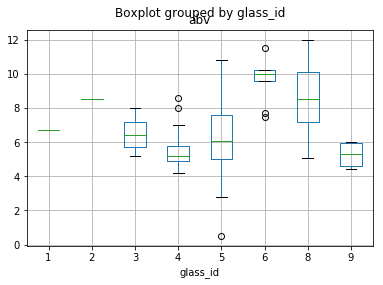

In [16]:
abv_glass = beer_glass.boxplot('abv', "glass_id")

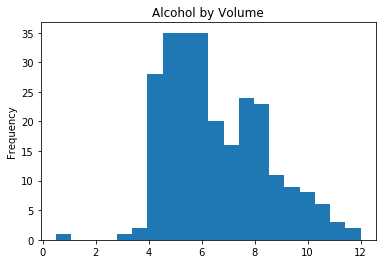

In [17]:
abv_hist = beer_glass.plot(y='abv', kind='hist', bins=20, title='Alcohol by Volume', legend=False)